In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def cleanName(filename):
    return "_".join(filename.split('/')[-1].split('_')[:-1])

In [57]:
df = pd.read_csv('giulia_t_lymphocytes_spatial_entropy.csv')
df['nodelist'] = df['nodelist'].apply(cleanName)
df['edgelist'] = df['edgelist'].apply(cleanName)
df['age'] = df['nodelist'].apply(lambda x: int(x.split('_')[0]))
df['gender'] = df['nodelist'].apply(lambda x: x.split('_')[1])
df['node_entropy'] = df['giulia_spatial_entropy'] / df['num_nodes']
df = df[df['gender']=='M']
print(len(df))
df.head()

24


,nodelist,edgelist,num_nodes,num_edges,giulia_spatial_entropy,runtime,age,gender,node_entropy
2,68_M_20_2,68_M_20_2,6402,502865,1.815416e+06,97.217744,68,M,283.570163
6,46_M_11_1,46_M_11_1,6402,502865,1.814314e+06,113.547492,46,M,283.398056
13,32_M_5_2,32_M_5_2,6402,502865,1.816352e+06,154.697504,32,M,283.716278
14,56_M_16_1,56_M_16_1,6402,502865,1.814180e+06,98.028946,56,M,283.377111
16,56_M_16_2,56_M_16_2,6402,502865,1.825862e+06,123.106913,56,M,285.201861


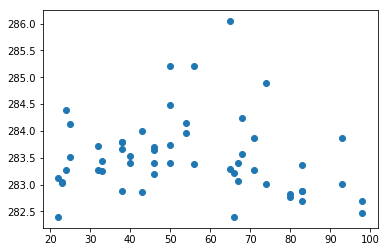

In [56]:
plt.scatter(df['age'],df['node_entropy'])

Num in each age group: [6, 2, 2, 2, 0]
Age averages for each group: [30.0, 46.0, 56.0, 74.0, nan]


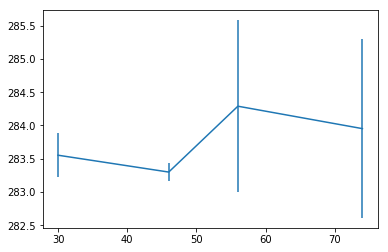

In [54]:
a = df[df['age'].apply(lambda x: x in range(25,35))]
b = df[df['age'].apply(lambda x: x in range(43,47))]
c = df[df['age'].apply(lambda x: x in range(55,63))]
d = df[df['age'].apply(lambda x: x in range(70,80))]
e = df[df['age'].apply(lambda x: x in range(92,98))]

num = [len(a),len(b),len(c),len(d),len(e)]

am = a['age'].mean()
bm = b['age'].mean()
cm = c['age'].mean()
dm = d['age'].mean()
em = e['age'].mean()

ages = [am,bm,cm,dm,em]

ane = a['node_entropy'].mean()
bne = b['node_entropy'].mean()
cne = c['node_entropy'].mean()
dne = d['node_entropy'].mean()
ene = e['node_entropy'].mean()

anev = a['node_entropy'].std()
bnev = b['node_entropy'].std()
cnev = c['node_entropy'].std()
dnev = d['node_entropy'].std()
enev = e['node_entropy'].std()

entropy = [ane,bne,cne,dne,ene]
error = [anev,bnev,cnev,dnev,enev]

print("Num in each age group: " + str(num))
print("Age averages for each group: " + str(ages))

plt.errorbar(ages,entropy,yerr=error)
plt.show()